**Path planning algorithm based on RRT-star**

In this code, we consider constraints for our problem, which can include obtacles, sensor requirements, etc. 

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt


In [0]:
class Node:
  def __init__(self, coord, parent, cost):
    self.coord = coord
    self.parent = parent
    self.cost = cost

class RRT:
  def __init__(self):
    self.nodes = {}
    self.q_start = Node([0,0],0,0)
    self.q_goal = Node([5,10], None, 0)


  def steer(self,qr, qn, val, eps):
    qnew = [0,0]
    if val >= eps:
      dist = np.linalg.norm (np.subtract(qr,qn))
      qnew[0] = qn[0] + ((qr[0] - qn[0])*eps)/dist
      qnew[1] = qn[1] + ((qr[1] - qn[1])*eps)/dist
    else:
      qnew[0] = qr[0]
      qnew[1] = qr[1]
    return [qnew[0],qnew[1]]

  def constraints(self,n2,n1):
    # if satisfied return True
    return True


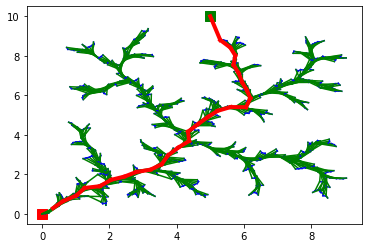

In [87]:
num_Nodes = 1000
x_max = 10
y_max = 10
EPS = 0.1
r=0.5

rrt = RRT()
rrt.nodes[0] = rrt.q_start
plt.figure()
for n in range(num_Nodes):
  q_rand = [random.random()*x_max, random.random()*y_max ]
  #plt.scatter(q_rand[0],q_rand[1], c = 'k', s = 10)
  for j in range(len(rrt.nodes.keys())):
    if np.linalg.norm( np.subtract(rrt.nodes[j].coord,rrt.q_goal.coord) ) < 0.5:
      break
  
  ndist = []
  for j in range(len(rrt.nodes.keys())):
    n = rrt.nodes[j];
    tmp = np.linalg.norm( np.subtract(n.coord, q_rand) );
    ndist.append(tmp)
  val = np.min(ndist)
  idx = np.argmin(ndist)
  q_near = rrt.nodes[idx]
  q_new = Node(None, None, None)
  q_new.coord = rrt.steer(q_rand, q_near.coord, val, EPS);
  if rrt.constraints(q_rand, q_near.coord):
    plt.plot([q_near.coord[0], q_new.coord[0]], [q_near.coord[1], q_new.coord[1]], c = 'b' )
    q_new.cost = np.linalg.norm(np.subtract(q_new.coord , q_near.coord)) + q_near.cost;


    q_nearest = {}
    
    neighbor_count = 0
    for j in range(len(rrt.nodes.keys())):
      if rrt.constraints( rrt.nodes[j].coord , q_new.coord ) and np.linalg.norm( np.subtract( rrt.nodes[j].coord , q_new.coord )) <= r:
        q_nearest[neighbor_count] = Node(None, None, None)
        q_nearest[neighbor_count].coord = rrt.nodes[j].coord
        q_nearest[neighbor_count].cost = rrt.nodes[j].cost
        neighbor_count +=1

    q_min = q_near
    C_min = q_new.cost
    #print(q_nearest[0].cost)
    for k in range(len(q_nearest.keys())):
      if rrt.constraints(q_nearest[k].coord, q_new.coord) and (q_nearest[k].cost + np.linalg.norm( np.subtract(q_nearest[k].coord,q_new.coord)) < C_min):
        q_min = q_nearest[k]
        C_min = q_nearest[k].cost + np.linalg.norm( np.subtract( q_nearest[k].coord, q_new.coord ) ) 
        plt.plot([q_min.coord[0], q_new.coord[0]], [q_min.coord[1], q_new.coord[1]], c = 'g')

    for j in range(len(rrt.nodes.keys())):
      if rrt.nodes[j].coord[0] == q_min.coord[0] and rrt.nodes[j].coord[1] == q_min.coord[1]:
        q_new.parent = j
    
    l = len(rrt.nodes.keys())
    rrt.nodes[l] = q_new


D = []
for j in range(len(rrt.nodes.keys())):
    tmpdist = np.linalg.norm(np.subtract(rrt.nodes[j].coord, rrt.q_goal.coord ) ) 
    D.append(tmpdist)

#search backward
val = np.min(D)
idx = np.argmin(D)

q_final = rrt.nodes[idx]
rrt.q_goal.parent = idx
q_end = rrt.q_goal
l = len(rrt.nodes.keys())
rrt.nodes[l] = rrt.q_goal
while q_end.parent != 0:
  start = q_end.parent
  plt.plot([q_end.coord[0], rrt.nodes[start].coord[0]] , [q_end.coord[1], rrt.nodes[start].coord[1]] , c = 'r',linewidth=4 )

  q_end = rrt.nodes[start]



plt.scatter(rrt.q_start.coord[0],rrt.q_start.coord[1], marker = 's', s=100, c = 'red')
plt.scatter(rrt.q_goal.coord[0],rrt.q_goal.coord[1], marker = 's', s=100, c = 'g')
plt.xlim(0,10)
plt.ylim(0,10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

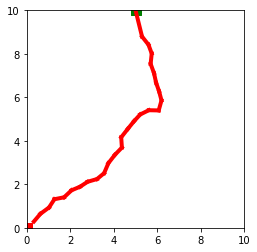

In [89]:
#search backward
val = np.min(D)
idx = np.argmin(D)

q_final = rrt.nodes[idx]
rrt.q_goal.parent = idx
q_end = rrt.q_goal
l = len(rrt.nodes.keys())
rrt.nodes[l] = rrt.q_goal
while q_end.parent != 0:
  start = q_end.parent
  plt.plot([q_end.coord[0], rrt.nodes[start].coord[0]] , [q_end.coord[1], rrt.nodes[start].coord[1]] , c = 'r',linewidth=4 )

  q_end = rrt.nodes[start]



plt.scatter(rrt.q_start.coord[0],rrt.q_start.coord[1], marker = 's', s=100, c = 'red')
plt.scatter(rrt.q_goal.coord[0],rrt.q_goal.coord[1], marker = 's', s=100, c = 'g')
plt.xlim(0,10)
plt.ylim(0,10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()